
# Superflux onsets

This notebook demonstrates how to recover the Superflux onset detection algorithm of
[Boeck and Widmer, 2013](https://www.dafx.de/paper-archive/2013/papers/09.dafx2013_submission_12.pdf) [1]_
from librosa.

This algorithm improves onset detection accuracy in the presence of vibrato.

.. [1] Böck, Sebastian, and Gerhard Widmer. 
    Maximum filter vibrato suppression for onset detection.
    In Proc. of the 16th Int. Conf. on Digital Audio Effects (DAFx).
    Maynooth, Ireland (Sept 2013), vol. 7, p. 4. 2013.


In [ ]:
# Code source: Brian McFee
# License: ISC

We'll need numpy and matplotlib for this example



In [1]:
import numpy as np
import matplotlib.pyplot as plt

import librosa

The method works fine for longer signals, but the
results are harder to visualize.



In [2]:
y, sr = librosa.load(librosa.ex('trumpet', hq=True),
                     sr=44100)

c:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


These parameters are taken directly from the paper



In [3]:
n_fft = 1024
hop_length = int(librosa.time_to_samples(1./200, sr=sr))
lag = 2
n_mels = 138
fmin = 27.5
fmax = 16000.
max_size = 3

The paper uses a log-frequency representation, but for
simplicity, we'll use a Mel spectrogram instead.



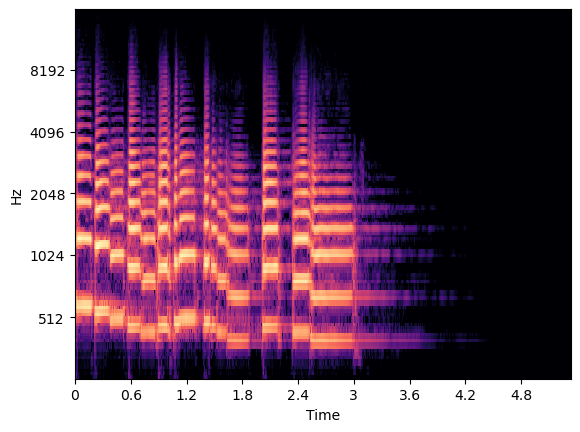

In [4]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft,
                                   hop_length=hop_length,
                                   fmin=fmin,
                                   fmax=fmax,
                                   n_mels=n_mels)


fig, ax = plt.subplots()
librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                         y_axis='mel', x_axis='time', sr=sr,
                         hop_length=hop_length, fmin=fmin, fmax=fmax, ax=ax)

Now we'll compute the onset strength envelope and onset events
using the librosa defaults.



In [5]:
odf_default = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
onset_default = librosa.onset.onset_detect(y=y, sr=sr, hop_length=hop_length,
                                           units='time')

And similarly with the superflux method



In [6]:
odf_sf = librosa.onset.onset_strength(S=librosa.power_to_db(S, ref=np.max),
                                      sr=sr,
                                      hop_length=hop_length,
                                      lag=lag, max_size=max_size)

onset_sf = librosa.onset.onset_detect(onset_envelope=odf_sf,
                                      sr=sr,
                                      hop_length=hop_length,
                                      units='time')

If you look carefully, the default onset detector (top sub-plot) has
several false positives in high-vibrato regions, eg around 0.62s or
1.80s.

The superflux method (middle plot) is less susceptible to vibrato, and
does not detect onset events at those points.



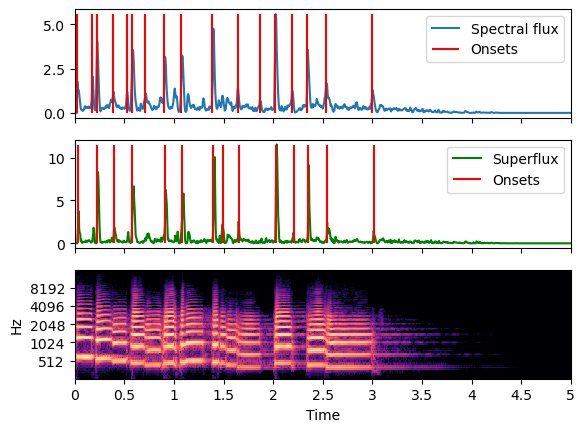

In [7]:
# sphinx_gallery_thumbnail_number = 2
fig, ax = plt.subplots(nrows=3, sharex=True)

frame_time = librosa.frames_to_time(np.arange(len(odf_default)),
                                    sr=sr,
                                    hop_length=hop_length)

librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                         y_axis='mel', x_axis='time', sr=sr,
                         hop_length=hop_length, fmin=fmin, fmax=fmax, ax=ax[2])
ax[2].set(xlim=[0, 5.0])


ax[0].plot(frame_time, odf_default, label='Spectral flux')
ax[0].vlines(onset_default, 0, odf_default.max(), color='r', label='Onsets')
ax[0].legend()
ax[0].label_outer()

ax[1].plot(frame_time, odf_sf, color='g', label='Superflux')
ax[1].vlines(onset_sf, 0, odf_sf.max(), color='r', label='Onsets')
ax[1].legend()
ax[0].label_outer()